In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('DataSet/co.csv', parse_dates=['Date Local'])
date = dataset["Date Local"]
means = dataset.iloc[:, 2].values
print(means)

[1.145833 0.878947 1.145833 0.878947 0.85     1.066667 0.85     1.066667
 1.929167 1.7625   1.929167 1.7625   1.991667 1.829167 1.991667 1.829167
 2.620833 2.7      2.620833 2.7      1.973913 2.308333 1.973913 2.308333
 2.3625   1.829167 2.3625   1.829167 2.541667 2.7875   2.541667 2.7875
 1.729167 1.675    1.729167 1.675    2.341667 2.179167 2.341667 2.179167
 2.604167 2.533333 2.604167 2.533333 2.295833 2.316667 2.295833 2.316667
 3.136364 2.958333 3.136364 2.958333 3.0125   3.575    3.0125   3.575
 2.754167 2.175    2.754167 2.175    1.5625   1.9625   1.5625   1.9625
 2.233333 1.9875   2.233333 1.9875   2.991667 2.891667 2.991667 2.891667
 2.533333 2.65     2.533333 2.65     2.231818 2.366667 2.231818 2.366667
 2.020833 1.9125   2.020833 1.9125   1.875    1.9125   1.875    1.9125
 1.8625   1.979167 1.8625   1.979167 1.991667 1.979167 1.991667 1.979167
 1.229167 1.554167 1.229167 1.554167]


In [3]:
def wrangle(df):
    
    df["Date Local"]=pd.to_datetime(df["Date Local"])
    df["Month"]=df["Date Local"].dt.month
    df["Year"]=df["Date Local"].dt.year
    df=df.drop("Date Local",axis=1)
    df=df.drop("Month",axis=1)
    df=df[df.Year>=1850]
    df=df.set_index(['Year'])
    #date=df.iloc[:,:0]
    
    
    df=df.dropna()
    
    return df

In [4]:
dataset = wrangle(dataset)

In [5]:
dataset

CO Units   CO Mean
Year                             
1917  Parts per million  1.145833
1918  Parts per million  0.878947
1919  Parts per million  1.145833
1920  Parts per million  0.878947
1921  Parts per million  0.850000
...                 ...       ...
2012  Parts per million  1.979167
2013  Parts per million  1.229167
2014  Parts per million  1.554167
2015  Parts per million  1.229167
2016  Parts per million  1.554167

[100 rows x 2 columns]

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1917 to 2016
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CO Units  100 non-null    object 
 1   CO Mean   100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [7]:
dataset = dataset.drop(columns=['CO Units'],axis=1)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1917 to 2016
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CO Mean  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [9]:
dataset.tail()

CO Mean
Year          
2012  1.979167
2013  1.229167
2014  1.554167
2015  1.229167
2016  1.554167

In [10]:
year_temp=[]
for i in range(len(date)):
    year_temp.append(date[i].year) 
year_temp = np.array(year_temp)
year_temp = year_temp.reshape(-1, 1)


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(year_temp,means,test_size=0.1,random_state=10)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
year_temp_poly = poly_reg.fit_transform(year_temp)
poly_reg.fit(year_temp_poly, means)

PolynomialFeatures()

In [13]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(year_temp_poly, means)

LinearRegression()

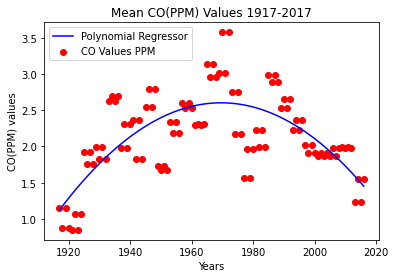

In [14]:
plt.scatter(year_temp, means, color = 'red',label="CO Values PPM")
plt.plot(year_temp, lin_reg_2.predict(poly_reg.fit_transform(year_temp)), color = 'blue',label="Polynomial Regressor")
plt.title("Mean CO(PPM) Values 1917-2017")
plt.xlabel("Years")
plt.ylabel("CO(PPM) values")
plt.legend(loc="upper left")
plt.show()

In [15]:
z = lin_reg_2.predict(poly_reg.fit_transform(year_temp))

from sklearn.metrics import mean_squared_error
print("The Mean Squared Error is ",round(mean_squared_error(means, z),4))

#Mean Square Error

The Mean Squared Error is  0.1605


In [16]:
print(lin_reg_2.predict(poly_reg.fit_transform([[2030]])))
#print(dataset_2.loc[len(dataset_2)-1,"ANNUAL"])

[0.65347432]
